Chúng tôi lưu trữ mã nguồn tại repository [này](https://github.com/Thaifitus/kn_thesis.git).

| Tên   | Nguyễn Trương Hoàng Thái  | Nguyễn Thiên Phúc  |
|---|---|---|
| MSSV  | 20127625  | 20127681  |

#  Phân tích khám phá dữ liệu của tập PARAREL


Chúng tôi thực hiện khám phá dữ liệu của tập PARAREL, dưới đây là các bước chính của quá trình xử lý và khám phá dữ liệu:

1. Cài đặt các thư viện cần thiết cho quá trình phân tích.

2. Tải tập dữ liệu thô lên và xử lý đưa về dạng DataFrame.

3. Thực hiện tiền xử lý và khám phá dữ liệu.

4. Thống kê số liệu phân tích trên tập dữ liệu, sau đó tiến hành nhận xét.

## I. Cài đặt thư viện cần thiết

In [ ]:
# Install libraries:
!pip install underthesea
!pip install wordcloud
!pip install jsonlines
!pip install fasttext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 68.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.9 MB/s eta 0:00:00


In [ ]:
'''
git clone specified branch.
'''

!git clone --branch main https://github.com/Thaifitus/determining_and_erasing_kns_in_transformer_thesis.git

Cloning into 'determining_and_erasing_kns_in_transformer_thesis'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 378 (delta 162), reused 163 (delta 111), pack-reused 154
Receiving objects: 100% (378/378), 94.49 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (173/173), done.
Updating files: 100% (211/211), done.


In [ ]:
%cd /kaggle/working/determining_and_erasing_kns_in_transformer_thesis/data/PARAREL

/kaggle/working/determining_and_erasing_kns_in_transformer_thesis/data/PARAREL


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import jsonlines
from IPython.display import Image, display
# from wordcloud import WordCloud
# from underthesea import word_tokenize
%matplotlib inline

## II.  PARAREL dataset (data_all.json)

### 1. Đọc và chuẩn bị dữ liệu

In [ ]:
data_all = pd.read_json("data_all.json")

### 2. Tiền xử lý và tạo bảng dữ liệu

In [ ]:
data_all_flatten = []
for i in range(len(data_all)):
    for j in range(len(data_all.columns)):
        data_all_flatten.append(data_all[j][i])
#write a function to flatten the data
def flatten_data(data):
    data_flatten = []
    for i in range(len(data)):
        for j in range(len(data.columns)):
            data_flatten.append(data[j][i])
    return data_flatten

In [ ]:
data_all_flatten = [x for x in data_all_flatten if x is not None]

In [ ]:
df = pd.DataFrame(data_all_flatten, columns=['prompt', 'answer', 'rel_label'])
df.head(5)

,prompt,answer,rel_label
0,Alan Turing works in the field of [MASK].,logic,P101(field of work)
1,Alan Turing specializes in [MASK].,logic,P101(field of work)
2,[MASK] is the specialization of Alan Turing.,logic,P101(field of work)
3,The expertise of Alan Turing is [MASK].,logic,P101(field of work)
4,[MASK] is the expertise of Alan Turing.,logic,P101(field of work)


### 3. Khám phá dữ liệu




**3.1** Có bao nhiêu dòng và cột trong dữ liệu?

In [ ]:
print("Số dòng: ", df.shape[0])
print("Số cột: ", df.shape[1])

Số dòng:  253448
Số cột:  3


| Tên cột   | Ý nghĩa                                                                  |
|-----------|--------------------------------------------------------------------------|
| prompt     | Mẫu câu đầu vào của mô hình có chứa 1 vị trí được ẩn đi với kí tự [MASK]|  
| answer    | Câu trả lời để điền vào [MASK]                                           |   
| rel_label | Nhãn thể hiện thông tin của quan hệ trong câu tương ứng                  |   

Có tổng cộng 253448 câu promtps với 3 đặc trưng tương ứng: câu truy vấn (prompt), câu trả lời (answer), nhãn quan hệ (rel_label)

In [ ]:
df.describe()

,prompt,answer,rel_label
count,253448,253448,253448
unique,235728,1729,34
top,"[MASK], which has diplomatic relations with Ge...",English,P407(language of work or name)
freq,82,12203,15786


In [ ]:
df.groupby('prompt').size().sort_values(ascending=False).head(10)

prompt
Germany maintains diplomatic relations with [MASK].      82
[MASK] ties diplomatic relations with Germany.           82
[MASK], which ties diplomatic relations with Germany     82
[MASK] has diplomatic relations with Germany.            82
[MASK] maintains diplomatic relations with Germany.      82
[MASK], which has diplomatic relations with Germany      82
Germany, which has diplomatic relations with [MASK]      82
Germany has diplomatic relations with [MASK].            82
Germany ties diplomatic relations with [MASK].           82
[MASK] maintains diplomatic relations with Australia.    80
dtype: int64

- Theo như mô tả của tác giả, họ đã loại bỏ đi 4 quan hệ và giữ lại 34 quan hệ từ tập dữ liệu trước

- Số lượng câu trả lời ít hơn số lượng câu truy vấn bởi vì một câu trả lời có thể dùng để trả lời cho nhiều câu truy vấn (dựa vào bảng thống kê câu truy vấn trùng)

**3.2** Có bao nhiêu dữ liệu bị thiếu trong mỗi cột?

In [ ]:
print("Dữ liệu bị thiếu:\n",df.isnull().sum())

Dữ liệu bị thiếu:
 prompt       0
answer       0
rel_label    0
dtype: int64


Không có trường dữ liệu nào bị thiếu

**3.3** Kiểu dữ liệu của từng thuộc tính là gì?

In [ ]:
df.dtypes

prompt       object
answer       object
rel_label    object
dtype: object

Kiểu dữ liệu của các trường dữ liệu là dạng đối tượng (string)

**3.4** Có bao nhiêu câu `prompt` bị trùng lặp trong tập dữ liệu?

In [ ]:
print("Số prompt trùng nhau: ", df['prompt'].duplicated().sum())
df[df['prompt'].duplicated(keep=False)].sort_values(by='prompt').head(6)

Số prompt trùng nhau:  17720


,prompt,answer,rel_label
83759,A-10 Thunderbolt II is developed by [MASK].,Fairchild,P176(manufacturer)
89614,A-10 Thunderbolt II is developed by [MASK].,Fairchild,P178(developer)
89619,"A-10 Thunderbolt II, created by [MASK].",Fairchild,P178(developer)
83763,"A-10 Thunderbolt II, created by [MASK].",Fairchild,P176(manufacturer)
145252,Abbasid Caliphate's capital city is [MASK].,Damascus,P36(capital)
149088,Abbasid Caliphate's capital city is [MASK].,Baghdad,P36(capital)


Từ bảng kết quả trên, ta thấy rằng có 17720 câu prompts bị trùng nhau trong tập dữ liệu, có thể nhận thấy rằng có những lý do sau:

- Hai câu prompt giống nhau nhưng thuộc hai quan hệ khác nhau

- Hai câu prompt giống nhau trong cùng quan hệ nhưng khác nhau về kết quả ở vị trí [MASK]

**3.5** Chiều dài lớn nhất, nhỏ nhất của thuộc tính `prompt` (dựa trên số lượng ký tự) là bao nhiêu?

In [ ]:
df['prompt_length'] = df['prompt'].apply(lambda x: len(x))
df.sort_values(by='prompt_length').head(5)


,prompt,answer,rel_label,prompt_length
25624,[MASK] owns DV .,Sony,P127(owned by),16
225025,"U2, from [MASK].",Ireland,P495(country of origin),16
25424,[MASK] owns DVD .,Sony,P127(owned by),17
25623,DV owner [MASK] .,Sony,P127(owned by),17
194356,[MASK] debuted Q.,BBC,P449(original network),17


In [ ]:
# find the longest prompt
df.sort_values(by='prompt_length', ascending=False).head(5)

,prompt,answer,rel_label,prompt_length
163527,The law in Organisation for Economic Co-operat...,French,P37(official language),119
159855,The law in Organisation for Economic Co-operat...,English,P37(official language),119
163284,The law in Organization for Security and Co-op...,Spanish,P37(official language),117
161556,The law in Organization for Security and Co-op...,Italian,P37(official language),117
157938,The law in Organization for Security and Co-op...,French,P37(official language),117


- Độ dài ngắn nhất của câu prompts là 16 ký tự và độ dài lớn nhất là 119 ký tự

**3.6** Thống kê phân phối chiều dài câu promt trong tập dữ liệu.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


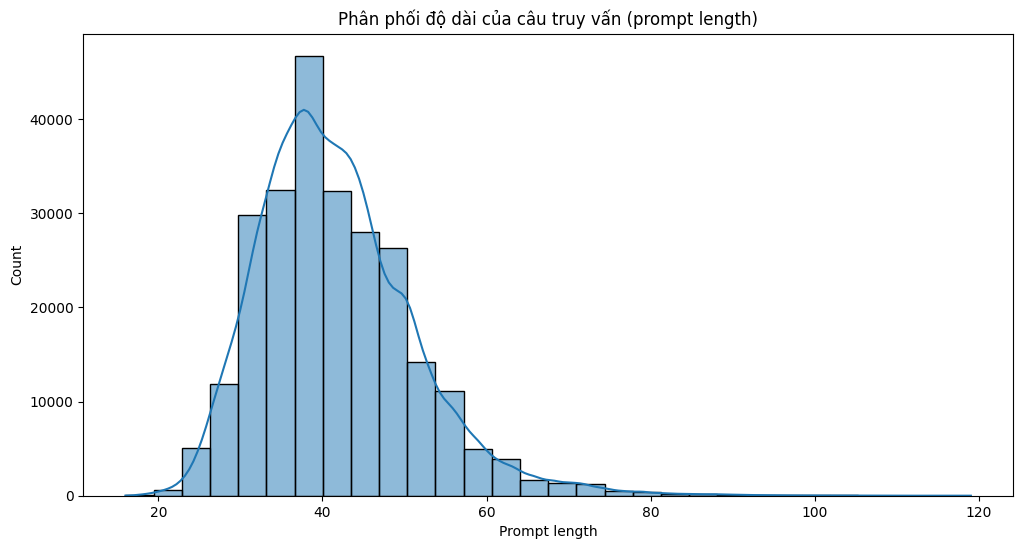

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['prompt_length'], bins=30, kde=True)
plt.title('Phân phối độ dài của câu truy vấn (prompt length)')
plt.xlabel('Prompt length')
plt.ylabel('Count')
plt.savefig("/kaggle/working/determining_and_erasing_kns_in_transformer_thesis/data/PARAREL/PromptLength.png")
plt.show()

Biểu đồ 3.6  thể hiện phân phối chiều dài câu prompt (câu hỏi) trong tập dữ liệu PARAREL cho thấy các đặc điểm sau:
- Phân phối lệch trái: Phần lớn các câu prompt có độ dài từ 30 đến 50 từ, với đỉnh phân phối nằm trong khoảng này. Các câu prompt ngắn hơn hoặc dài hơn xuất hiện với tần suất thấp hơn.

- Độ dài trung bình: Chiều dài trung bình của câu prompt nằm trong khoảng 40 đến 50 từ. Điều này cho thấy các câu hỏi trong tập dữ liệu thường có độ dài vừa phải, không quá ngắn cũng không quá dài.

- Độ phân tán: Mặc dù đỉnh phân phối tập trung ở khoảng 40-50 từ, nhưng độ dài câu prompt vẫn có sự phân tán đáng kể, từ khoảng 20 đến 80 từ. Điều này cho thấy sự đa dạng trong cách diễn đạt và độ phức tạp của các câu hỏi trong tập dữ liệu.

- Câu prompt dài hiếm: Các câu prompt có độ dài trên 80 từ xuất hiện rất ít, cho thấy tập dữ liệu không chứa nhiều câu hỏi phức tạp hoặc yêu cầu nhiều thông tin.


**3.7** Tần suất xuất hiện của các từ trong câu prompts có trong tập dữ liệu.

**Thực hiện loại bỏ các kí tự đặc biệt trong trường câu truy vấn**

In [ ]:
df['prompt'] = df['prompt'].str.replace(r'[^\w\s]', ' ', regex=True) \
                           .str.replace(r'\d+', '', regex=True) \
                           .str.replace(r'[_\n\t]', ' ', regex=True) \
                           .str.replace(r' +', ' ', regex=True) \
                           .str.strip() \
                           .str.lower()
all_prompts = ' '.join(df['prompt'].values)

**Thống kê số lượng các từ độc nhất có trong tập câu truy vấn**

In [ ]:
from collections import Counter
# Chuyển chuỗi all_prompts thành một danh sách các từ
words = all_prompts.split()

# Đếm tần suất xuất hiện của từng từ
word_counts = Counter(words)

**Trực quan hoá tần xuất suất hiện của các từ có trong tập dữ liệu**

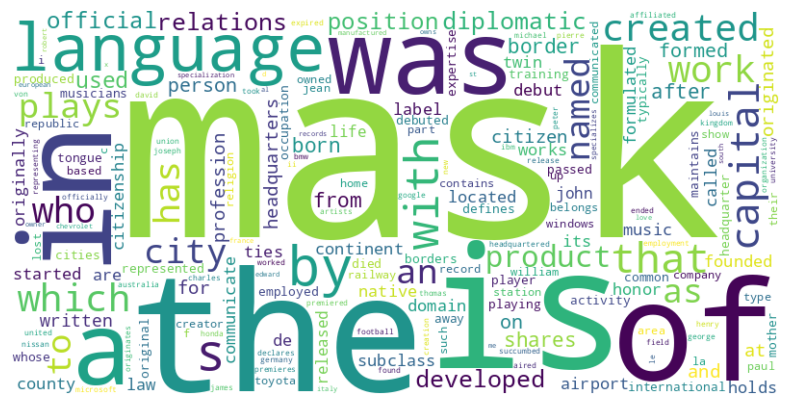

In [ ]:
# Tần suất xuất hiện của các từ trong câu hỏi có trong tập dữ liệu, sử dụng word cloud
from wordcloud import WordCloud
from underthesea import word_tokenize

# Tạo một WordCloud từ từ điển tần suất
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Hiển thị WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
wordcloud.to_file("/kaggle/working/determining_and_erasing_kns_in_transformer_thesis/data/PARAREL/WordCloud1.png")
plt.show()

Biểu đồ 3.7 cho thấy tập dữ liệu PARAREL tập trung chủ yếu vào các chủ đề liên quan đến
- Con người: Các từ như "person", "citizenship", "born", "died", "life", "native", "tongue", "religion", "twin" và tên các quốc gia, thành phố cho thấy tập dữ liệu chứa nhiều thông tin về tiểu sử, nguồn gốc, quốc tịch, tôn giáo và nơi ở của con người.

- Nghệ thuật và giải trí: Các từ như "music", "artist", "playing", "released", "label", "show" và "premiered" cho thấy tập dữ liệu có nhiều thông tin về âm nhạc, nghệ sĩ, các sản phẩm âm nhạc và sự kiện liên quan đến nghệ thuật.

- Địa điểm: Các từ như "city", "located", "headquarters", "country", "borders", "continent", "airport" và tên các quốc gia, thành phố cho thấy tập dữ liệu chứa nhiều thông tin về địa điểm, vị trí địa lý của các tổ chức, sự kiện và con người.

- Quan hệ: Các từ như "relations", "with", "belongs", "shares", "part", "formed", "union", "work" và "diplomatic" cho thấy tập dữ liệu chứa nhiều thông tin về các mối quan hệ giữa các cá nhân, tổ chức và quốc gia.

- Ngoài ra, tập dữ liệu cũng chứa các thông tin về các lĩnh vực khác như luật pháp ("law"), thể thao ("football"), doanh nghiệp ("company", "headquarters") và lịch sử ("formed", "originated", "passed").


**3.8** Tần suất xuất hiện của câu prompts trong mỗi quan hệ

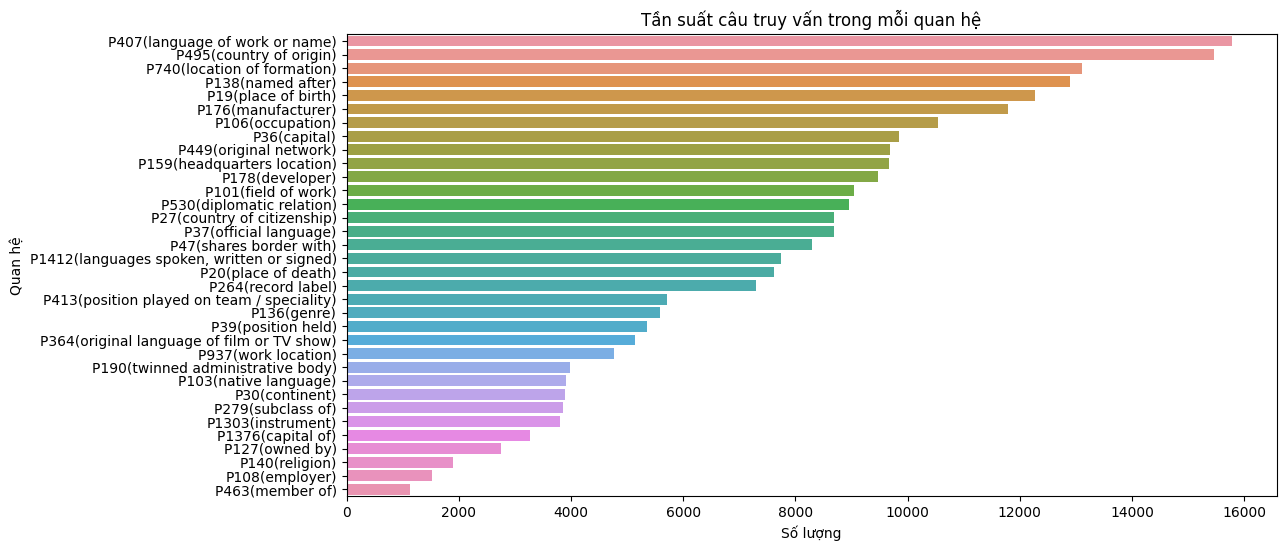

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='rel_label', data=df, order=df['rel_label'].value_counts().index)
plt.title('Tần suất câu truy vấn trong mỗi quan hệ')
plt.xlabel('Số lượng')
plt.ylabel('Quan hệ')
plt.savefig("/kaggle/working/determining_and_erasing_kns_in_transformer_thesis/data/PARAREL/PromptFrequency.png")
plt.show()

Từ biểu đồ 3.8 có thể thấy rằng: hai quan hệ có số lượng câu truy vấn lớn nhất là quan hệ “P407” và “P495”. Bên cạnh đó, quan hệ có số lượng câu truy vấn ít (ít hơn 2000 câu truy vấn) là các quan hệ “P140”, “P108” và “P463”

## III. PARAREL dataset (data_all_allbags.json)

### 1. Đọc và chuẩn bị dữ liệu

In [ ]:
with open("data_all_allbags.json", "r") as f:
    data_str = f.read()

data_dict = json.loads(data_str)

### 2. Tiền xử lý

**2.1**  Cấu trúc của dữ liệu


In [ ]:
print(type(data_dict))

<class 'dict'>


- Cấu trúc của tập dữ liệu là dạng từ điển (dict) với khoá (key) chính là tên quan hệ, giá trị (value) chính là các template, trong mỗi template sẽ chứa các phần tử (item) bao gồm: `câu truy vấn (prompt)`, `từ trả lời (answer)`, `nhãn quan hệ (rel_label)`
- Cấu trúc tổng quan được chia thành 3 tầng chính:
  - **Tầng 1**: Tên quan hệ
  - **Tầng 2**: Template của quan hệ
  - **Tầng 3**: Phần tử của từng template (`prompt`, `answer`, `rel_label`)

**2.2** Tổng số template và tổng số item của từng template

In [ ]:
relation_template_count = {}
relation_template_item_count = {}
for relation in data_dict.keys():
    relation_template_count[relation] = len(data_dict[relation])

for relation in data_dict.keys():
    relation_template_item_count[relation] = [len(data_dict[relation][i]) for i in range(0, len(data_dict[relation]))]

print("Tổng số template: ", sum(relation_template_count.values()))
print("Tổng số item: ", sum([sum(relation_template_item_count[relation]) for relation in data_dict.keys()]))
print("Tổng số quan hệ: ", len(data_dict.keys()))

Tổng số template:  27738
Tổng số item:  253448
Tổng số quan hệ:  34


### 3. Khám phá dữ liệu

- Trong bước này, chúng ta thực hiện chuyển đổi từ file dữ liệu từ json sang kiểu dataframe của python để thực hiện khám phá dữ liệu và áp dụng các thư viện trực quan hoá dữ liệu dễ hơn

- Cấu trúc dữ liệu sau khi biến đổi bao gồm 3 cột chính: `relation`, `template_count`, `item_count_in_template`, `total_item`

- **Mục đích:** Dễ dàng thống kế sử dụng thư viện pandas và trực quan hoá với thư viện matplotlib, seaborn

**3.1** Ý nghĩa các cột

| Tên cột   | Ý nghĩa                                                                  |
|-----------|--------------------------------------------------------------------------|
| relation     | Tên quan hệ |  
| template_count    | Số lượng template của quan hệ tương ứng|   
| total_item    | Tổng số lượng item của từng quan hệ |   
| item_count_in_template | Danh sách chứa số lượng item của template trong quan hệ tương ứng|   

**3.2** Biến đổi thành dạng dataframe

In [ ]:
relation_template_df = pd.DataFrame(\
    {'relation': list(relation_template_count.keys()),\
     'template_count': list(relation_template_count.values()),\
     'total_item': [sum(relation_template_item_count[relation]) for relation in data_dict.keys()],\
     'item_count_in_template': list(relation_template_item_count.values())
     })
relation_template_df['total_item'] = relation_template_df['item_count_in_template'].apply(lambda x: sum(x))
relation_template_df.sample(5)

,relation,template_count,total_item,item_count_in_template
28,P463,225,1125,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
30,P495,909,15453,"[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1..."
31,P530,996,8964,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
16,P20,953,7624,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
8,P138,645,12900,"[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2..."


- **Nhận xét**
1. **Cấu trúc của DataFrame:**

  DataFrame này có 4 cột: `relation`, `template_count`, `total_item`, và `item_count_in_template`.
  Mỗi hàng trong DataFrame tương ứng với một quan hệ cụ thể trong tập dữ liệu.
2. **Các cột trong DataFrame**:
  -  `relation`: Đây là cột chứa tên của các quan hệ (relation) trong tập dữ liệu. Ví dụ: P463, P495, P530, P20, P138.
  - `template_count`: Cột này chứa số lượng mẫu (template) tương ứng với mỗi quan hệ. Ví dụ: Quan hệ P463 có 225 template, quan hệ P495 có 909 mẫu.
  - `total_item`: Đây là tổng số lượng phần tử (item) trong các mẫu của từng quan hệ. Ví dụ: Quan hệ P463 có tổng cộng 1125 phần tử, quan hệ P495 có tổng cộng 15453 phần tử.
  - `item_count_in_template`: Cột này chứa danh sách số lượng phần tử trong từng mẫu của quan hệ tương ứng. Ví dụ: Quan hệ P463 có các mẫu với số lượng phần tử như [5, 5, 5, 5,...].

3. **Nhận xét cụ thể**:

  - Quan hệ P138: Có 645 template với tổng số 12900 phần tử. Các template của quan hệ này có số lượng phần tử tương đối đồng đều, chủ yếu là 20 phần tử trong mỗi template.
  - Quan hệ P495: Có 909 template với tổng số 15453 phần tử. Tương tự như quan hệ P138, các template của quan hệ này cũng có số lượng phần tử khá đồng đều, với mỗi template chứa 17 phần tử.
  - Quan hệ P530: Có 996 template với tổng số 8964 phần tử. Mỗi template trong quan hệ này cũng có 9 phần tử, cho thấy sự đồng đều trong phân bố số lượng phần tử.
  - Quan hệ P20: Có 953 template nhưng chỉ có tổng số 7624 phần tử. Mỗi template trong quan hệ này cũng có 8 phần tử, cho thấy sự đồng đều trong phân bố số lượng phần tử.
  - Quan hệ P463: Có 225 template với tổng số 1125 phần tử. Các template của quan hệ này cũng có số lượng phần tử ít hơn, với mỗi template chứa 5 phần tử.

  **Tổng quan**:

  - DataFrame relation_template_df cho thấy sự khác biệt rõ rệt trong số lượng mẫu và số lượng phần tử trong từng mẫu của các quan hệ khác nhau.
  - Một số quan hệ có số lượng mẫu và phần tử lớn, trong khi một số quan hệ khác lại có số lượng phần tử ít hơn trong từng mẫu.
  - Việc phân tích này giúp nhận diện rõ ràng sự phân bố và tính đồng đều của dữ liệu trong tập PARAREL, từ đó có thể đưa ra các chiến lược xử lý và phân tích phù hợp.


**3.3** Kiểm tra dữ liệu bị thiếu, bị trùng

In [ ]:
print('Dữ liệu bị thiếu: ', relation_template_df.isnull().sum())


Dữ liệu bị thiếu:  relation                  0
template_count            0
total_item                0
item_count_in_template    0
dtype: int64


**3.4** Thống kê tổng số lượng template từng quan hệ trong tập dữ liệu



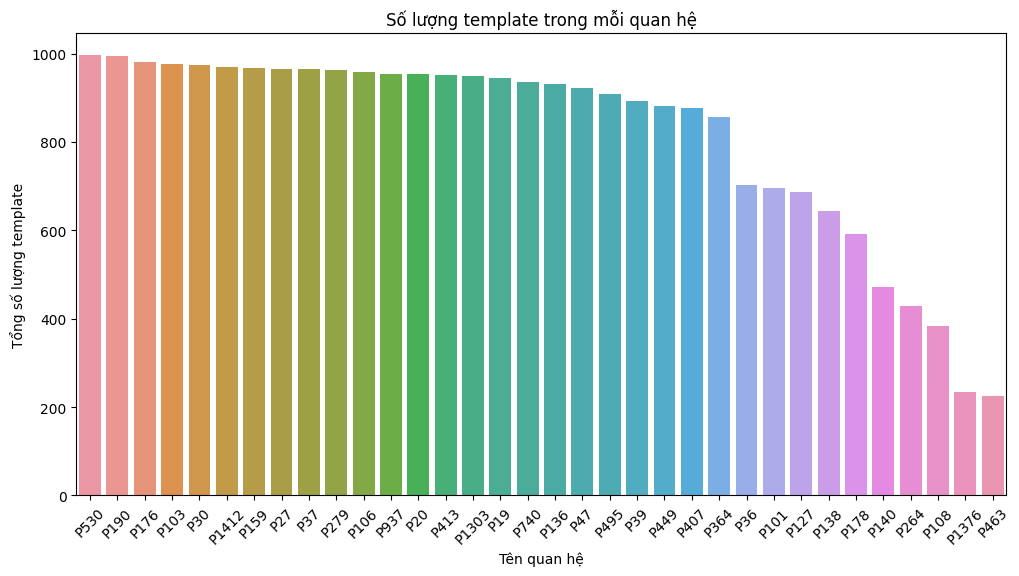

In [ ]:
relation_template_df = relation_template_df.sort_values(by='template_count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=relation_template_df['relation'], y=relation_template_df['template_count'])
plt.xticks(rotation=45)
plt.title('Số lượng template trong mỗi quan hệ')
plt.xlabel('Tên quan hệ')
plt.ylabel('Tổng số lượng template')
plt.savefig("/kaggle/working/determining_and_erasing_kns_in_transformer_thesis/data/PARAREL/TemplateInRelation.png")
plt.show()


**3.5** Thống kê tổng số lượng item trong từng template




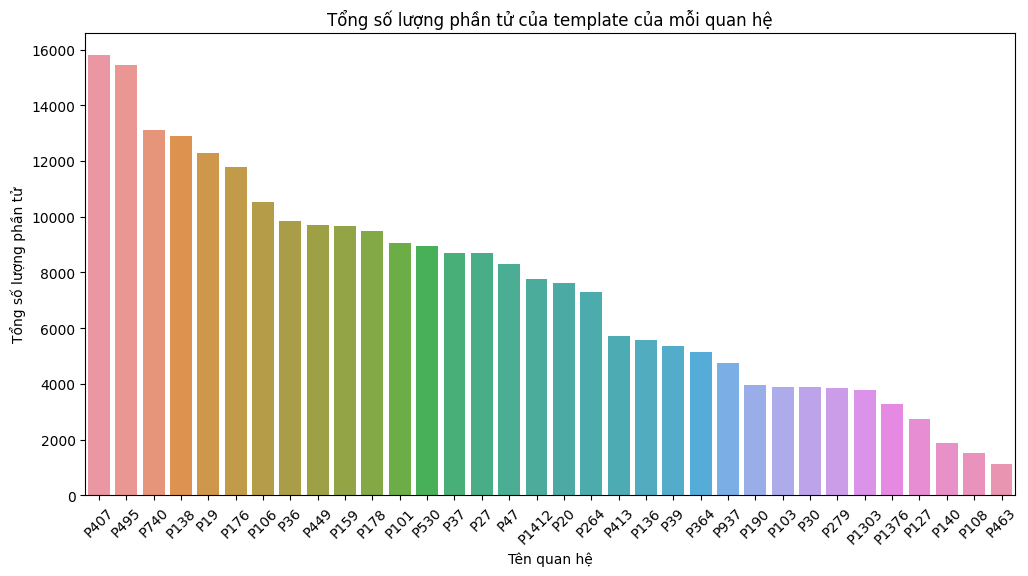

In [ ]:
relation_template_df = relation_template_df.sort_values(by='total_item', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=relation_template_df['relation'], y=relation_template_df['total_item'])
plt.xticks(rotation=45)
plt.title('Tổng số lượng phần tử của template của mỗi quan hệ')
plt.xlabel('Tên quan hệ')
plt.ylabel('Tổng số lượng phần tử')
plt.savefig("/kaggle/working/determining_and_erasing_kns_in_transformer_thesis/data/PARAREL/ItemsInTemplate.png")
plt.show()

Từ hai biểu đồ 3.4 và 3.5 cho thấy rằng: số lượng phần tử của quan hệ “P407” và “P495” đứng đầu về số lượng phần tử, tương ứng với biểu đồ thể hiện số lượng template thuộc quan hệ “P407” và “P495” cũng nằm trong top cao nhất. Điều này cho thấy số lượng template càng nhiều thì số lượng phần tử trong template của quan hệ đó cũng lớn

Các quan hệ có số lượng template và phần tử thuộc template thấp nhất trong tập dữ liệu là những quan hệ “P108”, “P1376”, “P463”. Ngoài ra, hơn một nửa số quan hệ của tập dữ liệu có số lượng template lớn hơn 800 template. Điều này cho thấy tập dữ liệu đảm bảo về tính đa dạng.
